# SIMPLE LINEAR REGRESSION. MINIMAL EXAMPLE

In [33]:
#import important libraries
import numpy as np
#não são essenciais, mas providenciam visualização
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [34]:
#generate random input data to train on
#criação de dados falsos com relação linear
#na vida real, pegam-se os dados de uma fonte externa
observations = 1000 #tamanho da dataset que queremos criar

#modelo linear de 2 variaveis f(x,z) = ax + bz + c
#np.random.uniform(low,high,size), pega um valor randomico entre low e high onde cada numero tem uma chance igual de aparecer
#size = (numero de observaçoes x numero de variaveis)
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

#np.colunm_stack(appropriate tuples) pega uma sequencia de arrays de 1 dimensão  e cocatena em um array de 2 dimensões
inputs = np.column_stack((xs,zs))

print(inputs.shape)

(1000, 2)


In [35]:
#create target we will aim on

# targets = f(x,z) = 2*x - 3*z + 5 +ruído
noise = np.random.uniform(-1,1,(observations,1))
targets = 2*xs - 3*zs + 5 + noise

print(targets.shape)

(1000, 1)


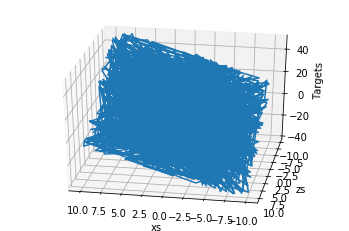

In [37]:
#plot the training data

targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

In [38]:
#initialize variables
init_range = 0.1 
#os pesos e biases iniciais serão adquiridos randomicamente do intervalo [-0.1;0.1]

weights = np.random.uniform(-init_range,init_range,size=(2,1))
biases = np.random.uniform(-init_range,init_range,size=1)

print(weights)
print(biases)

[[0.04892228]
 [0.03995346]]
[0.0653724]


In [39]:
#set a learning rate
learning_rate = 0.02                  #afeta a velocidade de convergência da otimização

In [47]:
#Train the model

'''plano da cálculo para cada iteração
    *calcular outputs
    *comparar outputs com targets
    *printar a perda(chamada de loss)
    *ajustar pesos e biases'''

#np.dot(A,B) :método de multiplicação de matrizes do numpy

for i in range (100):
    outputs = np.dot(inputs,weights)+biases
    deltas = outputs - targets
    
    #L2 norm-loss = somatorio em (i) de [(outputs(i) - targets(i))^2]
    #np.sum(A) : soma todos os valores de um vetor A
    loss = np.sum(deltas**2)/2             #divide por 2 por causa do metodo gradiente descendente(?)
    loss = loss/observations               #aquisição da mean loss (perda média)
    print(loss)
    
    #ajustando pesos e biases via gradiente descendente
    deltas_scaled = deltas/observations
    weights = weights - learning_rate*np.dot(inputs.T,deltas_scaled)             #algo.T é a matriz transposta de algo
    biases = biases - learning_rate*np.sum(deltas_scaled)

0.17563450299997296
0.17548544919646566
0.17534229693283823
0.17520481254733813
0.17507277162966506
0.1749459586546751
0.17482416663058736
0.17470719676111954
0.17459485812100098
0.17448696734433242
0.17438334832528563
0.1742838319306526
0.17418825572377586
0.1740964636994105
0.1740083060290817
0.17392363881652662
0.17384232386281803
0.17376422844078762
0.17368922507838075
0.17361719135058873
0.1735480096796195
0.17348156714298021
0.1734177552891579
0.17335646996059886
0.1732976111236961
0.17324108270550853
0.17318679243694493
0.17313465170215692
0.17308457539389474
0.17303648177458972
0.17299029234293797
0.17294593170576497
0.1729033274549655
0.17286241004931344
0.1728231127009531
0.17278537126638407
0.17274912414176213
0.17271431216234584
0.1726808785059243
0.1726487686000683
0.17261793003305442
0.17258831246831485
0.1725598675622752
0.17253254888544564
0.1725063118466352
0.17248111362016788
0.17245691307597968
0.17243367071248394
0.1724113485920939
0.17238991027929945
0.172369320781

In [48]:
#print de weights e biases para adquirir os valores que a rede aprendeu

print(weights,biases)

[[ 1.99886904]
 [-3.00342972]] [4.98753235]


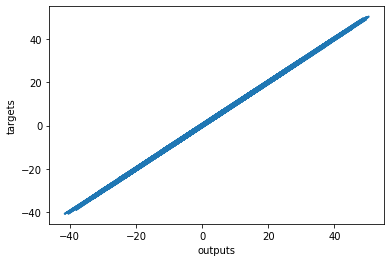

In [49]:
#plot dos outputs X targets, a curva esperada é uma reta 45°
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()